In [1]:
from collections import Counter
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import pandas as pd
import os
from IPython.display import clear_output
import numpy as np
from scipy.sparse import load_npz, csr_matrix
from scipy.io import loadmat

In [2]:
params = {'axes.spines.top'    : False,
          'axes.spines.right'  : False,
          'text.usetex': True,
          'axes.labelsize': 15, 
          'axes.titlesize': 12,
          'font.size': 12, 
          'legend.fontsize': 12, 
          'xtick.labelsize': 10,
          'ytick.labelsize': 15,
          'ytick.direction':'in',
          'figure.figsize': [15,5],
          'font.family': 'serif',}

mpl.pyplot.rcParams.update(params)

In [3]:
def upperIndex(size):
    a = np.zeros((size,size))
    up = np.triu_indices(size)
    a[up] = 1
    di = np.diag_indices(size)
    a[di] = 0 
    return(np.nonzero(a))

In [4]:
indices = upperIndex(1191)
translate = {}

for i in range(len(indices[0])):
    translate[i] = (indices[0][i],indices[1][i])

In [5]:
pred1 = load_npz('data/usf/usf_pred1.npz')

# Second Order 
pred2 = load_npz('data/usf/usf_pred2.npz')
pred3 = load_npz('data/usf/usf_pred3.npz')
pred4 = load_npz('data/usf/usf_pred4.npz')

# Third Order 
pred5 = load_npz('data/usf/usf_pred5.npz')
pred6 = load_npz('data/usf/usf_pred6.npz')
pred7 = load_npz('data/usf/usf_pred7.npz')
pred8 = load_npz('data/usf/usf_pred8.npz')

In [6]:
def inSecondOrder(index):
    if pred2[index] !=0 or pred3[index] != 0 or pred4[index]!=0:
        return True
    else:
        return False
    
def inThirdOrder(index):
    if pred5[index] !=0 or pred6[index] != 0\
    or pred7[index]!=0 or pred8[index] != 0:
        return True
    else:
        return False

In [7]:
matrices = loadmat('data/usf_colexMats.mat')

sumMat = []

for key in matrices.keys():
    if type(matrices[key]) == type(matrices['207']):
        sumMat.append(matrices[key])

totalMat = sum(sumMat)

In [8]:
eng_ex = load_npz('data/usf_eng_ex.npz')

In [9]:
nonzero_colex = set(zip(*np.nonzero(totalMat)))
upper = set(zip(*upperIndex(1026)))
diagonal = set([(i,i) for i in range(1026)])
english = set(zip(*np.nonzero(eng_ex)))

In [10]:
ord1_indices =  (set(zip(*np.nonzero(pred1))) & nonzero_colex  & upper) - diagonal - english

In [11]:
ord2_indices = (set(zip(*np.nonzero(pred2 + pred3 + pred4))) & nonzero_colex  & upper)\
                - ord1_indices - diagonal - english

In [12]:
ord3_indices = (set(zip(*np.nonzero(pred5 + pred6 + pred7+pred8)))& nonzero_colex &upper)\
                - ord1_indices - ord2_indices - diagonal  - english

In [13]:
# Coverage percentage 

len(ord1_indices|ord2_indices|ord3_indices)/len((nonzero_colex & upper) - diagonal)

0.8979480164158686

In [14]:
ord1_indices = np.array(list(ord1_indices))
ord1_indices = (ord1_indices[:,0],ord1_indices[:,1])

In [15]:
ord2_indices = np.array(list(ord2_indices))
ord2_indices = (ord2_indices[:,0],ord2_indices[:,1])

In [16]:
ord3_indices = np.array(list(ord3_indices))
ord3_indices = (ord3_indices[:,0],ord3_indices[:,1])

In [17]:
family_mats = loadmat('data/usf_colex_family.mat')
climate_mats = loadmat('data/usf_colex_climate.mat')
geography_mats = loadmat('data/usf_colex_geography.mat')

In [18]:
fam_ord1 = []
fam_ord2 = []
fam_ord3 = []

for i in range(1000):
    os.system('clear')
    clear_output(wait=True)
    print('Trial #: ', i)
    
    meanFam = family_mats[str(i)]
    ord1, ord2, ord3 = (meanFam.toarray()[ord1_indices],
                    meanFam.toarray()[ord2_indices],
                    meanFam.toarray()[ord3_indices])
    fam_ord1.append(np.mean(ord1))
    fam_ord2.append(np.mean(ord2))
    fam_ord3.append(np.mean(ord3))

Trial #:  999


In [19]:
geo_ord1 = []
geo_ord2 = []
geo_ord3 = []

for i in range(1000):
    os.system('clear')
    clear_output(wait=True)
    print('Trial #: ', i)
    
    meanGeo = geography_mats[str(i)]

    ord1, ord2, ord3 = (meanGeo.toarray()[ord1_indices],
                    meanGeo.toarray()[ord2_indices],
                    meanGeo.toarray()[ord3_indices])
    geo_ord1.append(np.mean(ord1))
    geo_ord2.append(np.mean(ord2))
    geo_ord3.append(np.mean(ord3))

Trial #:  999


In [20]:
clim_ord1 = []
clim_ord2 = []
clim_ord3 = []

for i in range(1000):
    os.system('clear')
    clear_output(wait=True)
    print('Trial #: ', i)
    
    meanClim = climate_mats[str(i)]
    
    ord1, ord2, ord3 = (meanClim.toarray()[ord1_indices],
                    meanClim.toarray()[ord2_indices],
                    meanClim.toarray()[ord3_indices])
    clim_ord1.append(np.mean(ord1))
    clim_ord2.append(np.mean(ord2))
    clim_ord3.append(np.mean(ord3))

Trial #:  999


# Print Results

In [21]:
print('CONTROL FOR FAMILY:')
print('-------First Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(fam_ord1),4),
                                       round(np.mean(fam_ord1)-1.96*np.std(fam_ord1),4),
                                       round(np.mean(fam_ord1)+1.96*np.std(fam_ord1),4)))
print('-------Second Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(fam_ord2),4),
                                       round(np.mean(fam_ord2)-1.96*np.std(fam_ord2),4),
                                       round(np.mean(fam_ord2)+1.96*np.std(fam_ord2),4)))
print('-------Third Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(fam_ord3),4),
                                       round(np.mean(fam_ord3)-1.96*np.std(fam_ord3),4),
                                       round(np.mean(fam_ord3)+1.96*np.std(fam_ord3),4)))

CONTROL FOR FAMILY:
-------First Order ---------
Mean: 0.0325, 95% CI: 0.0308,0.0343
-------Second Order ---------
Mean: 0.0095, 95% CI: 0.0088,0.0101
-------Third Order ---------
Mean: 0.0056, 95% CI: 0.0052,0.0061


In [22]:
print('CONTROL FOR GEOGRAPHY:')
print('-------First Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(geo_ord1),4),
                                       round(np.mean(geo_ord1)-1.96*np.std(geo_ord1),4),
                                       round(np.mean(geo_ord1)+1.96*np.std(geo_ord1),4)))
print('-------Second Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(geo_ord2),4),
                                       round(np.mean(geo_ord2)-1.96*np.std(geo_ord2),4),
                                       round(np.mean(geo_ord2)+1.96*np.std(geo_ord2),4)))
print('-------Third Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(geo_ord3),4),
                                       round(np.mean(geo_ord3)-1.96*np.std(geo_ord3),4),
                                       round(np.mean(geo_ord3)+1.96*np.std(geo_ord3),4)))

CONTROL FOR GEOGRAPHY:
-------First Order ---------
Mean: 0.0375, 95% CI: 0.032,0.0429
-------Second Order ---------
Mean: 0.012, 95% CI: 0.0094,0.0146
-------Third Order ---------
Mean: 0.0079, 95% CI: 0.0056,0.0103


In [23]:
print('CONTROL FOR CLIMATE:')
print('-------First Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(clim_ord1),4),
                                       round(np.mean(clim_ord1)-1.96*np.std(clim_ord1),4),
                                       round(np.mean(clim_ord1)+1.96*np.std(clim_ord1),4)))
print('-------Second Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(clim_ord2),4),
                                       round(np.mean(clim_ord2)-1.96*np.std(clim_ord2),4),
                                       round(np.mean(clim_ord2)+1.96*np.std(clim_ord2),4)))
print('-------Third Order ---------')
print('Mean: {}, 95% CI: {},{}'.format(round(np.mean(clim_ord3),4),
                                       round(np.mean(clim_ord3)-1.96*np.std(clim_ord3),4),
                                       round(np.mean(clim_ord3)+1.96*np.std(clim_ord3),4)))

CONTROL FOR CLIMATE:
-------First Order ---------
Mean: 0.029, 95% CI: 0.0259,0.032
-------Second Order ---------
Mean: 0.0085, 95% CI: 0.007,0.0101
-------Third Order ---------
Mean: 0.0057, 95% CI: 0.0034,0.008


# Graph 

In [24]:
def  draw_subplots(figure, data, err, i):
    figure.grid(True, which='both', axis = 'y',zorder = 0)

    figure.bar(list(range(3)),
       data,
       align = 'center', width = 0.7, edgecolor = 'none',
       color = ('#c1828d','#d6a4ad', '#ffccd8'), zorder =2,
       yerr=err, error_kw=dict(ecolor='dimgray', lw=1, zorder=3))

    figure.set_xlim(-1,3)
    figure.set_ylim(0, 0.045)
    figure.yaxis.set_ticks_position('left')
    figure.xaxis.set_ticks_position('bottom')
    figure.set_yticks(np.arange(0,0.045,0.01))
    if i == 0: 
        figure.set_ylabel('Colexification Frequency')

In [25]:
fam_means = [np.mean(fam_ord1), np.mean(fam_ord2), np.mean(fam_ord3)]
fam_err = [np.std(fam_ord1), np.std(fam_ord2), np.std(fam_ord3)]

geo_means = [np.mean(geo_ord1), np.mean(geo_ord2), np.mean(geo_ord3)]
geo_err = [np.std(geo_ord1), np.std(geo_ord2), np.std(geo_ord3)]

clim_means = [np.mean(clim_ord1), np.mean(clim_ord2), np.mean(clim_ord3)]
clim_err = [np.std(clim_ord1), np.std(clim_ord2), np.std(clim_ord3)]

means = [fam_means, clim_means, geo_means]
errors = [fam_err, clim_err, geo_err]

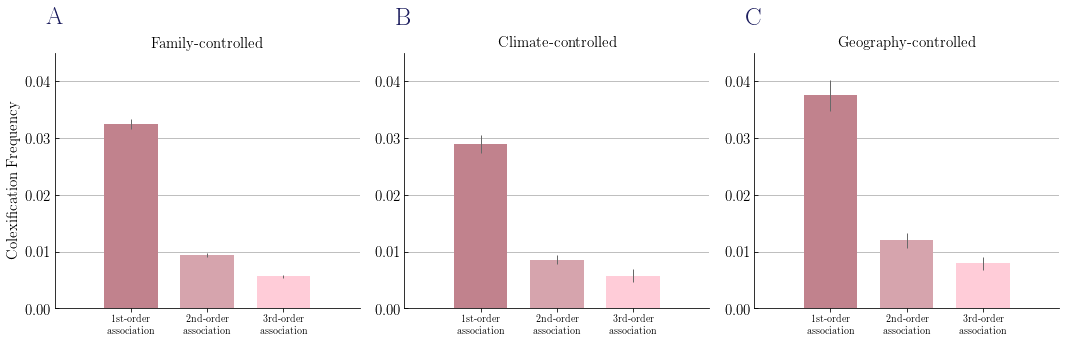

In [30]:
fig, axes = mpl.pyplot.subplots(1, 3)
mpl.pyplot.setp(axes, xticks=list(range(3)), 
         xticklabels=('1st-order \n association',
                      '2nd-order \n association',
                      '3rd-order \n association'))

for i in range(3): 
    draw_subplots(axes[i],means[i],errors[i],i) 
    
axes[0].set_title('Family-controlled', size = 15)
axes[1].set_title('Climate-controlled', size = 15)
axes[2].set_title('Geography-controlled', size = 15)

axes[0].text(-1, 0.05,'A', size = 25, ha='center', color = '#1F2060')
axes[1].text(-1, 0.05,'B', size = 25, ha='center', color = '#1F2060')
axes[2].text(-1, 0.05,'C', size = 25, ha='center', color = '#1F2060')

mpl.pyplot.tight_layout()
    
mpl.pyplot.savefig('usf_order.eps', format='eps', dpi=600)
mpl.pyplot.show()